# PATSTAT Python Library: A Primer

## Setup

### Import the library module

In [1]:
from epo.tipdata.patstat import PatstatClient

### Intantiate the client object

**Note**

As reported by the client instantiation output below, by default you will be working with a **test database**.

It's recommended to use it during the whole development phase, as it is way faster to test. You can switch anytime to the complete database (called 'PROD') without needing to apply any change to your code.

In [7]:
patstat = PatstatClient(env='PROD')

## Inspecting the PATSTAT database schema

PATSTAT is structured into two major sets of tables: *GLOBAL* and *REGISTER*

With the following commands you can get displayed the database schema, tables and relations for both of them.
This can help quickly finding the needed information, and defining the relevant queries 

### Getting the schema of PATSTAT GLOBAL 

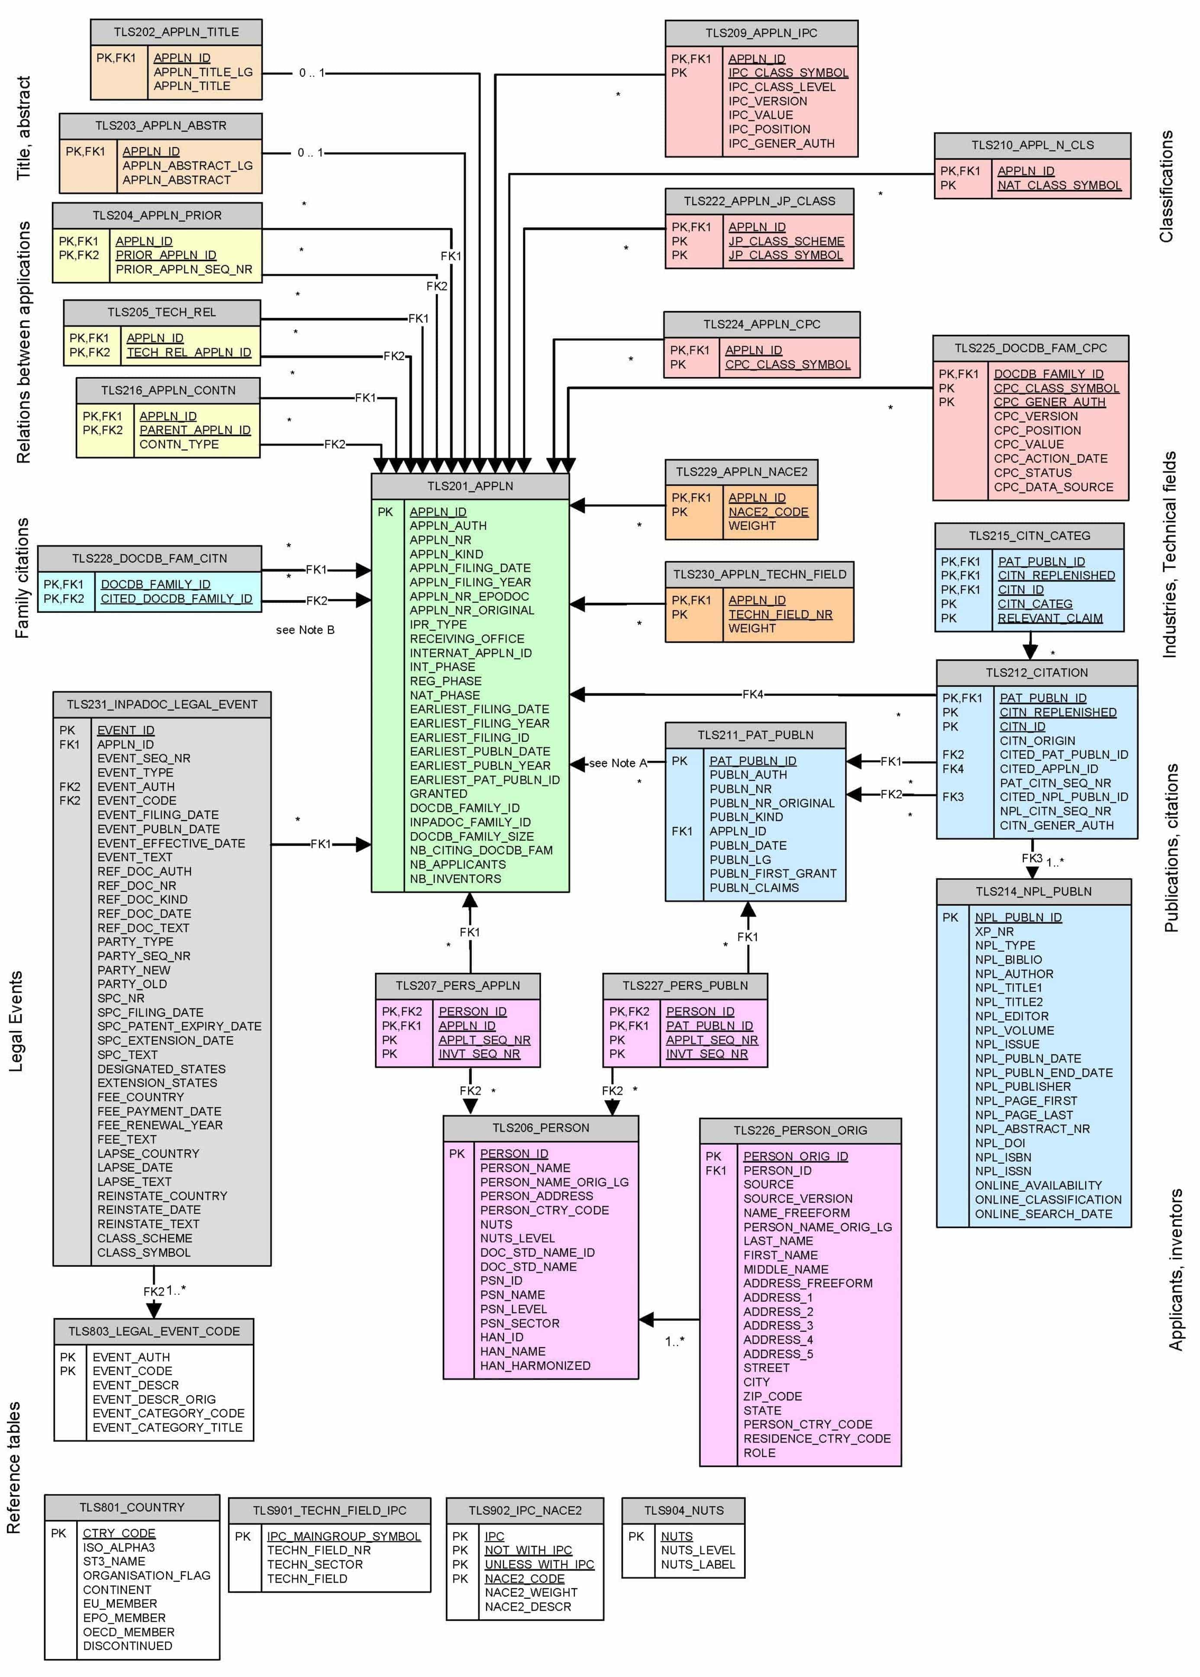

In [3]:
# Get the picture of the schema, as provided in the official documentation
patstat.global_schema()

In [4]:
# Get the list of tables also as a Python list
patstat.list_global_tables()

['tls201_appln',
 'tls204_appln_prior',
 'tls205_tech_rel',
 'tls216_appln_contn',
 'tls209_appln_ipc',
 'tls210_appln_n_cls',
 'tls222_appln_jp_class',
 'tls224_appln_cpc',
 'tls225_docdb_fam_cpc',
 'tls228_docdb_fam_citn',
 'tls231_inpadoc_legal_event',
 'tls211_pat_publn',
 'tls212_citation',
 'tls214_npl_publn',
 'tls215_citn_categ',
 'tls206_person',
 'tls207_pers_appln',
 'tls226_person_orig',
 'tls227_pers_publn',
 'tls801_country',
 'tls803_legal_event_code',
 'tls901_techn_field_ipc',
 'tls902_ipc_nace2',
 'tls903_region',
 'tls229_appln_nace2',
 'tls230_appln_techn_field',
 'tls202_appln_title',
 'tls203_appln_abstr']

### Getting the schema of PATSTAT REGISTER 

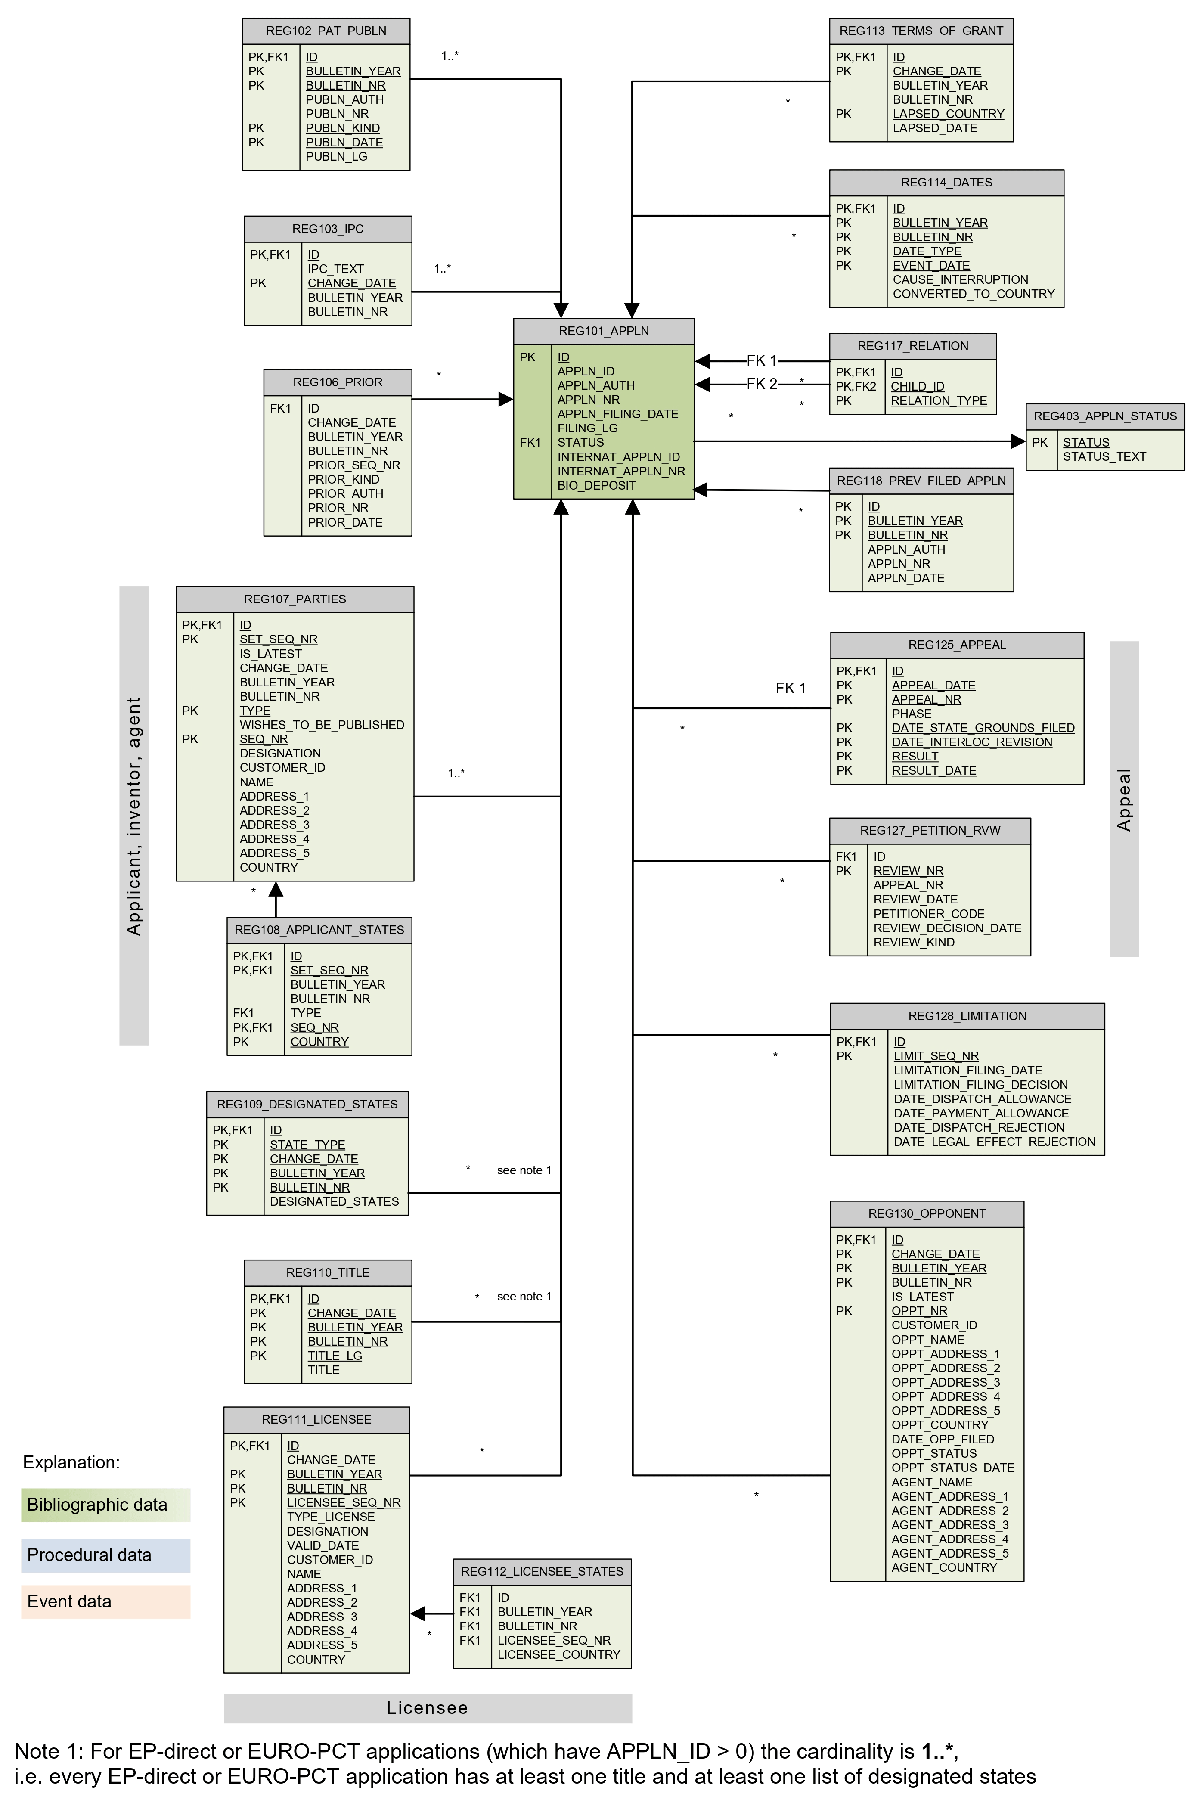

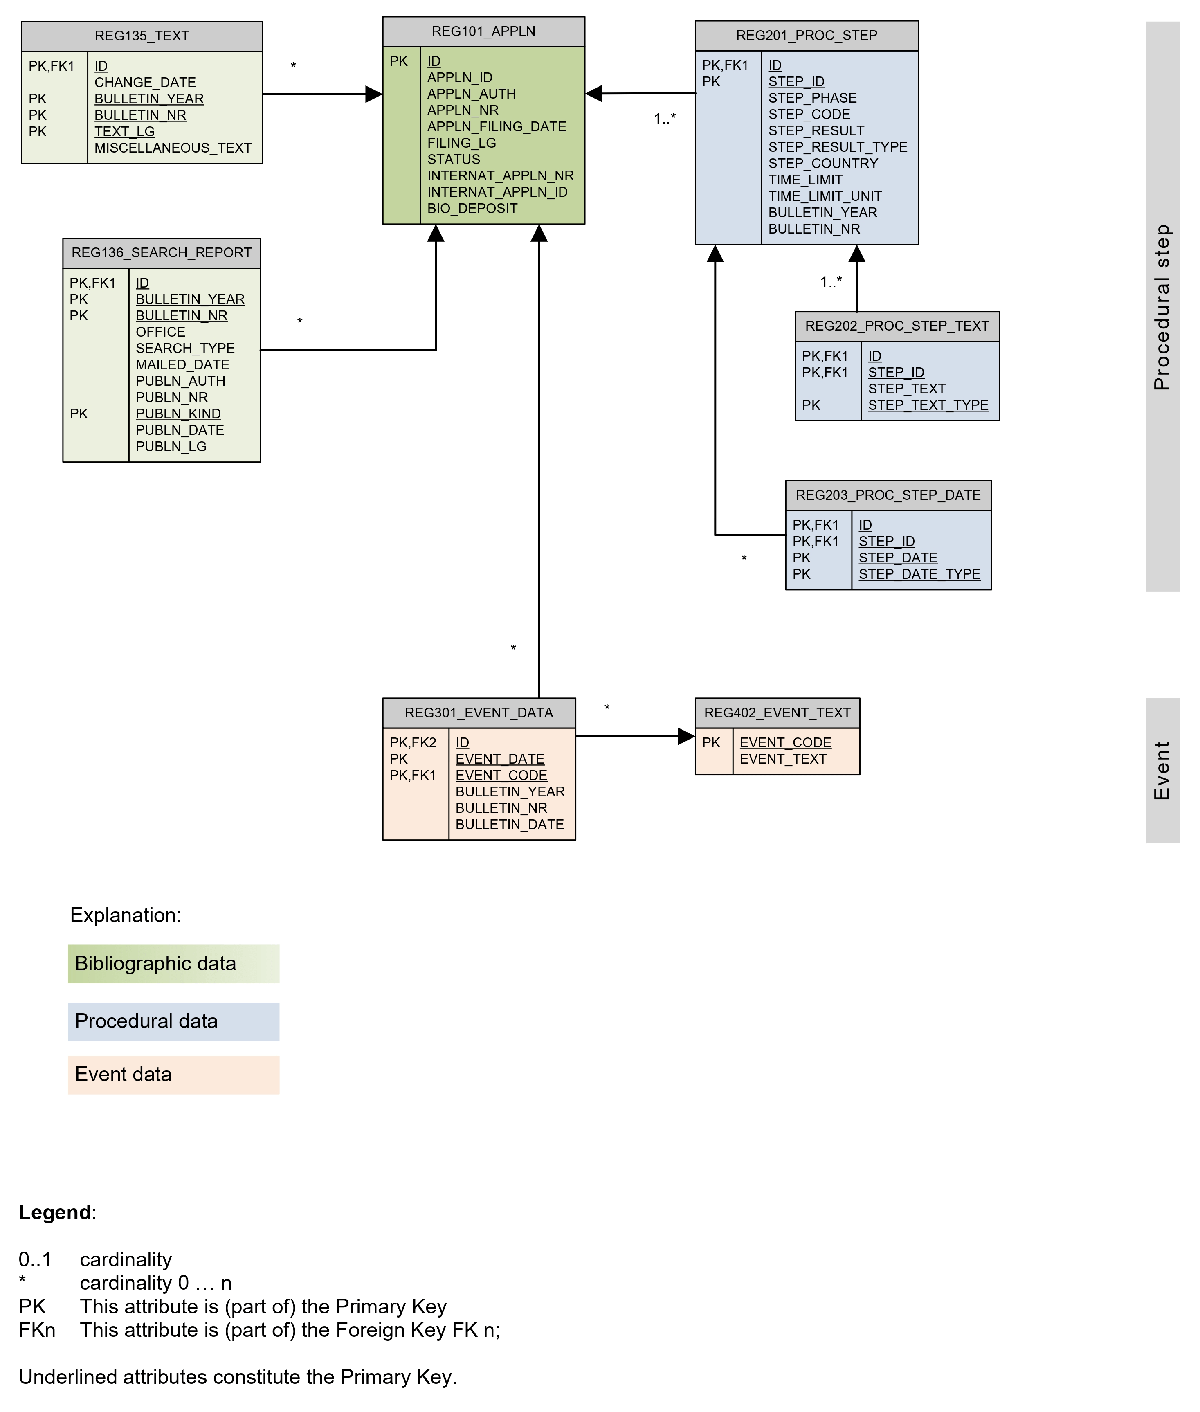

In [5]:
# As a picture
patstat.register_schema()

In [6]:
# As Python list
patstat.list_register_tables()

['reg101_appln',
 'reg102_pat_publn',
 'reg110_title',
 'reg118_prev_filed_appln',
 'reg103_ipc',
 'reg125_appeal',
 'reg127_petition_rvw',
 'reg128_limitation',
 'reg135_text',
 'reg136_search_report',
 'reg117_relation',
 'reg403_appln_status',
 'reg107_parties',
 'reg108_applicant_states',
 'reg109_designated_states',
 'reg111_licensee',
 'reg112_licensee_states',
 'reg130_opponent',
 'reg106_prior',
 'reg201_proc_step',
 'reg202_proc_step_text',
 'reg203_proc_step_date',
 'reg301_event_data',
 'reg402_event_text',
 'reg113_terms_of_grant',
 'reg114_dates',
 'reg701_appln',
 'reg705_places_of_business',
 'reg707_parties',
 'reg731_event_data',
 'reg741_appln_status',
 'reg742_event_text',
 'reg711_licensee',
 'reg712_licensee_states',
 'reg714_dates',
 'reg721_proc_step',
 'reg722_proc_step_text',
 'reg723_proc_step_date']

## Using the ORM

### Instantiate the ORM 

In [9]:
db = patstat.orm()

Here you can import all the tables that you need to use. 

It's also possible to alternatively use:

```Python
from epo.tipdata.patstat.database import model
```

And then use `tab`-based autocompletion to get a hint on the list of the table models

In [10]:
from epo.tipdata.patstat.database.models import TLS201_APPLN, TLS202_APPLN_TITLE, TLS206_PERSON, TLS207_PERS_APPLN, TLS224_APPLN_CPC, TLS231_INPADOC_LEGAL_EVENT

### 5 easy to understand SQL queries to get you started with PATSTAT 

#### Example 1: Granted EPO applications filed in 2010

List all granted applications filed at EPO (direct +PCT) having a year of filing = 2010. 

In [9]:
q = db.query(TLS201_APPLN.appln_id, TLS201_APPLN.appln_auth, TLS201_APPLN.appln_nr, 
                           TLS201_APPLN.appln_kind, TLS201_APPLN.appln_filing_date).\
             filter(TLS201_APPLN.appln_filing_year == 2010,
                    TLS201_APPLN.appln_auth == 'EP',
                    TLS201_APPLN.granted == 'Y')
patstat.df(q)

,appln_id,appln_auth,appln_nr,appln_kind,appln_filing_date
0,274222610,EP,10000313,A,2010-01-14
1,274369023,EP,10000849,A,2010-01-28
2,274681480,EP,10001469,A,2010-02-12
3,274720647,EP,10001552,A,2010-02-16
4,274875659,EP,10002051,A,2010-03-01
...,...,...,...,...,...
515,364674236,EP,10860973,A,2010-12-22
516,405968954,EP,13165754,A,2010-09-20
517,448177758,EP,16150333,A,2010-08-12
518,470108142,EP,16192322,A,2010-07-16


#### Example 2: EPO application in a range and a specific field.

List all applications filed at EPO (direct +PCT) that were filed between 2010 and 2015 (included) which have a CPC classification symbol in the field of wind energy.  Applications that have multiple CPC classifications in wind energy will occur multiple times in the list. 

Observe the blanks and % wildcard in the CPC classification symbol !

In [5]:
q = db.query(TLS201_APPLN.appln_id, TLS201_APPLN.appln_auth, TLS201_APPLN.appln_nr,
                           TLS201_APPLN.appln_kind, TLS201_APPLN.appln_filing_date, TLS224_APPLN_CPC.cpc_class_symbol).\
             join(TLS224_APPLN_CPC).\
             filter(TLS201_APPLN.appln_filing_year.between(2010, 2015),
                    TLS201_APPLN.appln_auth == 'EP',
                    TLS224_APPLN_CPC.cpc_class_symbol.like('Y02E  10/7%')).\
             order_by(TLS201_APPLN.appln_id)
patstat.df(q)

,appln_id,appln_auth,appln_nr,appln_kind,appln_filing_date,cpc_class_symbol
0,274088046,EP,10150465,A,2010-01-11,Y02E 10/72
1,274154890,EP,10150606,A,2010-01-13,Y02E 10/72
2,274154890,EP,10150606,A,2010-01-13,Y02E 10/727
3,274209407,EP,10000294,A,2010-01-14,Y02E 10/72
4,274209433,EP,10000317,A,2010-01-14,Y02E 10/72
...,...,...,...,...,...,...
5101,583551712,EP,22209927,A,2013-07-02,Y02E 10/72
5102,583551712,EP,22209927,A,2013-07-02,Y02E 10/76
5103,583918479,EP,22211827,A,2015-10-06,Y02E 10/72
5104,586040661,EP,23151711,A,2011-11-17,Y02E 10/72


#### Example 3: EPO applications filed by a certain applicant
List all applications filed by 'NOKIA CORPORATION'. 

We used the PATSTAT Standardised Name  (psn_name) which will give more (better) results then if we would have used  the “person_name” (name as published on the patent document) instead.

In [11]:
q = db.query(TLS201_APPLN.appln_id, TLS201_APPLN.appln_auth, TLS201_APPLN.appln_nr,
                           TLS201_APPLN.appln_kind, TLS201_APPLN.appln_filing_date, TLS206_PERSON.psn_name,
                           TLS202_APPLN_TITLE.appln_title).\
             select_from(TLS201_APPLN).\
             join(TLS207_PERS_APPLN).\
             join(TLS206_PERSON).\
             join(TLS202_APPLN_TITLE).\
             filter(TLS206_PERSON.psn_name == 'CARL ZEISS').\
             order_by(TLS201_APPLN.appln_filing_date.desc())
patstat.df(q)

,appln_id,appln_auth,appln_nr,appln_kind,appln_filing_date,psn_name,appln_title
0,5527381,CA,769419D,A,9999-12-31,CARL ZEISS,"PROJECTOR FOR SLOWLY CHANGING PICTURES, PARTIC..."
1,5396253,CA,638229D,A,9999-12-31,CARL ZEISS,SOURCE OF BEAMS FOR PRODUCING A HIGH INTENSITY...
2,18730072,FR,18969D,A,9999-12-31,CARL ZEISS,"Dispositif pour copier, dans l'espace ou sur u..."
3,18724072,FR,13701D,A,9999-12-31,CARL ZEISS,Procédé pour rendre parallèles l'axe d'articul...
4,5396244,CA,638220D,A,9999-12-31,CARL ZEISS,METHOD AND MEANS FOR WELDING AND SOLDERING USI...
...,...,...,...,...,...,...,...
3672,46762465,US,1901074735,A,1901-09-09,CARL ZEISS,PHOTOGRAPHIC CURTAIN-SHUTTER.
3673,46738548,US,1901069701,A,1901-07-25,CARL ZEISS,OPTICAL INSTRUMENT FOR MEASURING THE DISTANCE ...
3674,46765433,US,1901043427,A,1901-01-15,CARL ZEISS,AUTOMATIC SHUTTER-SETTING MECHANISM.
3675,46689239,US,1900000160,A,1900-01-02,CARL ZEISS,PHOTOGRAPHIC OBJECTIVE.


#### Example 4: Create hitlist for applicant
Create a hitlist of Chinese applicants filing patents at the EPO (direct or PCT). 

In [12]:
from sqlalchemy import func
q = db.query(TLS206_PERSON.psn_name, TLS206_PERSON.person_ctry_code,
                           func.count(TLS201_APPLN.appln_id).label('APPLICATIONS_AT_EPO')).\
             select_from(TLS206_PERSON).\
             join(TLS207_PERS_APPLN).join(TLS201_APPLN).\
             filter(TLS206_PERSON.person_ctry_code == 'DE',
                    TLS207_PERS_APPLN.applt_seq_nr > 0,
                    TLS207_PERS_APPLN.invt_seq_nr == 0,
                    TLS201_APPLN.appln_auth == 'EP').\
             group_by(TLS206_PERSON.psn_name, TLS206_PERSON.person_ctry_code).\
             order_by(func.count(TLS201_APPLN.appln_id).desc()).limit(10)
patstat.df(q)

,psn_name,person_ctry_code,APPLICATIONS_AT_EPO
0,SIEMENS,DE,48809
1,ROBERT BOSCH,DE,33602
2,BASF (BADISCHE ANILIN & SODA FABRIK),DE,24621
3,BAYER,DE,12896
4,BSH (BOSCH UND SIEMENS HAUSGERAETE),DE,9208
5,HENKEL,DE,8623
6,FRAUNHOFER,DE,7885
7,HOECHST,DE,6215
8,VOLKSWAGEN,DE,5987
9,BMW (BAYERISCHE MOTOREN WERKE),DE,5915


#### Example 5: Filter applicant applications by target country 
Create a list of granted EP applications filed by Chinese applicants for which a renewal fee was paid in Belgium. 

The  “ AND appln_auth = 'EP' ” condition in the WHERE clause is in principle redundant because the “event_code = 'PGFP'” (Post Grant Fee Paid) condition implies that the application is a granted European patent (EP). 

In [13]:
q = db.query(TLS206_PERSON.psn_name, TLS206_PERSON.person_ctry_code, TLS201_APPLN.appln_auth,
                           TLS201_APPLN.appln_nr, TLS201_APPLN.appln_kind, TLS201_APPLN.appln_filing_date,
                           TLS231_INPADOC_LEGAL_EVENT.fee_country, TLS231_INPADOC_LEGAL_EVENT.fee_payment_date,
                           TLS231_INPADOC_LEGAL_EVENT.fee_renewal_year, TLS202_APPLN_TITLE.appln_title,
                           TLS201_APPLN.appln_id).\
             select_from(TLS201_APPLN).\
             join(TLS207_PERS_APPLN).join(TLS206_PERSON).join(TLS231_INPADOC_LEGAL_EVENT).join(TLS202_APPLN_TITLE).\
             filter(TLS206_PERSON.person_ctry_code == 'CN',
                    TLS207_PERS_APPLN.applt_seq_nr > 0,
                    TLS201_APPLN.appln_auth == 'EP',
                    TLS231_INPADOC_LEGAL_EVENT.event_code == 'PGFP',
                    TLS231_INPADOC_LEGAL_EVENT.fee_country == 'BE').\
             distinct().\
             order_by(TLS231_INPADOC_LEGAL_EVENT.fee_payment_date.desc()).limit(10)
patstat.df(q)

,psn_name,person_ctry_code,appln_auth,appln_nr,appln_kind,appln_filing_date,fee_country,fee_payment_date,fee_renewal_year,appln_title,appln_id
0,JIANGSU SHENMA ELECTRIC COMPANY,CN,EP,13849544,A,2013-10-24,BE,2023-09-18,11,A COMPOSITE TOWER COMPRISING ACROSS ARM STRUCT...,417363519
1,"Yueli Electric (Jiangsu) Co., Ltd.",CN,EP,15860005,A,2015-10-30,BE,2023-09-18,9,WHEEL-HUB DRIVEN WIND TURBINES,456192321
2,BAFANG ELECTRIC (SUZHOU) COMPANY,CN,EP,07740080,A,2007-03-28,BE,2023-03-21,17,ELECTRICALLY ASSISTED BICYCLE AND UNIT ADAPTED...,408291
3,SHANGHAI GHREPOWER GREEN ENERGY COMPANY,CN,EP,11835510,A,2011-05-27,BE,2020-05-07,10,POWER SUPPLY SYSTEM WITH INTEGRATION OF WIND P...,353444681
4,SHANGHAI INSTITUTE OF PHARMACEUTICAL INDUSTRY,CN,EP,12760538,A,2012-03-22,BE,2020-02-25,9,"NEW CRYSTAL FORM VII OF AGOMELATINE, PREPARATI...",375672617
5,SHANGHAI INSTITUTE OF PHARMACEUTICAL INDUSTRY,CN,EP,12761142,A,2012-03-22,BE,2020-02-25,9,"MIXED CRYSTAL AGOMELATINE (FORM-VIII), PREPARA...",375673878
6,SHANGHAI GHREPOWER GREEN ENERGY COMPANY,CN,EP,11852207,A,2011-09-02,BE,2019-09-25,9,WIND TURBINE WITH A MECHANISM FOR SYNCHRONOUSL...,364728514
7,NORTHEASTERN UNIVERSITY,CN,EP,15171679,A,2015-06-11,BE,2018-04-25,4,AN ENERGY INTERNET AND A HIERARCHICAL CONTROL ...,441132792


## RAW SQL

It is of course also possible to access PATSTAT directly using SQL, without using the ORM simplification. 
The following examples replicate the previous cases, but the solution is given as direct SQL query

### 5 easy to understand SQL queries to get you started with PATSTAT

#### Example 1 
List all granted applications filed at EPO (direct +PCT) having a year of filing = 2010.

**Note** This and the next examples use the **legacy SQL** dialect, which e.g. allows to use the `+` notation in the sleect statement (see in particular `appln_auth +appln_nr + appln_kind number` nelow). 

The legacy SQL dialect is selected by *default* for enabling backwards compatibility with legacy PATSTAT scripts. It can be set using the parameter `use_legacy_sql` (by default set to `True`)

In [14]:
res = patstat.sql_query("""
SELECT appln_id, appln_auth +appln_nr + appln_kind number, appln_filing_date 

FROM tls201_appln 

WHERE appln_filing_year = 2010	--application filing year  = 2010 

AND appln_auth ='EP'		--patents filed at the EPO (direct + PCT) 

AND granted = 	'Y'	--the patent has been granted 
""")
res[0:5]

[{'appln_id': 274222610,
  'number': 'EP10000313A ',
  'appln_filing_date': datetime.date(2010, 1, 14)},
 {'appln_id': 274369023,
  'number': 'EP10000849A ',
  'appln_filing_date': datetime.date(2010, 1, 28)},
 {'appln_id': 274681480,
  'number': 'EP10001469A ',
  'appln_filing_date': datetime.date(2010, 2, 12)},
 {'appln_id': 274720647,
  'number': 'EP10001552A ',
  'appln_filing_date': datetime.date(2010, 2, 16)},
 {'appln_id': 274875659,
  'number': 'EP10002051A ',
  'appln_filing_date': datetime.date(2010, 3, 1)}]

#### Example 2
List all applications filed at EPO (direct +PCT) that were filed between 2010 and 2015 (included) which have a CPC classification symbol in the field of wind energy. Applications that have multiple CPC classifications in wind energy will occur multiple times in the list. 

Observe the blanks and % wildcard in the CPC classification symbol !

In [15]:
res = patstat.sql_query("""
SELECT tls201_appln.appln_id, appln_auth +appln_nr + appln_kind number, appln_filing_date, cpc_class_symbol 

FROM tls201_appln JOIN tls224_appln_cpc  

ON tls201_appln.appln_id = tls224_appln_cpc.appln_id 

WHERE appln_filing_year between 2010 and 2015  	--application filing between 2010 and 2015 

AND appln_auth ='EP' 					--patents filed at the EPO (direct + PCT) 

AND cpc_class_symbol like 'Y02E  10/7%'		--CPC classification for wind energy 

ORDER BY tls201_appln.appln_id			--orders the results per application 
""")
res[0:5]

[{'tls201_appln_appln_id': 274088046,
  'number': 'EP10150465A ',
  'appln_filing_date': datetime.date(2010, 1, 11),
  'cpc_class_symbol': 'Y02E  10/72'},
 {'tls201_appln_appln_id': 274154890,
  'number': 'EP10150606A ',
  'appln_filing_date': datetime.date(2010, 1, 13),
  'cpc_class_symbol': 'Y02E  10/72'},
 {'tls201_appln_appln_id': 274154890,
  'number': 'EP10150606A ',
  'appln_filing_date': datetime.date(2010, 1, 13),
  'cpc_class_symbol': 'Y02E  10/727'},
 {'tls201_appln_appln_id': 274209407,
  'number': 'EP10000294A ',
  'appln_filing_date': datetime.date(2010, 1, 14),
  'cpc_class_symbol': 'Y02E  10/72'},
 {'tls201_appln_appln_id': 274209433,
  'number': 'EP10000317A ',
  'appln_filing_date': datetime.date(2010, 1, 14),
  'cpc_class_symbol': 'Y02E  10/72'}]

#### Example 3
List all applications filed by 'NOKIA CORPORATION'. We use the PATSTAT Standardised Name (psn_name) which will give more (better) results than if we would have used the “person_name” (name as published on the patent document) instead.

**Note** also that in this and the following examples we will use the **standard SQL** dialect (parameter `use_legacy_sql` set to `False`). 

**Note 2** : As you can see, it is **NOT** necessary to enter the name of the project and the dataset in the query string (which is normally requested by standard BigQuery SQL). The `sql_query` method does this for you! 

In [16]:
res = patstat.sql_query("""
SELECT tls201_appln.appln_id, appln_auth, appln_nr, appln_kind, appln_filing_date, psn_name, appln_nr_epodoc, appln_title 

FROM tls201_appln JOIN tls207_pers_appln ON tls201_appln.appln_id = tls207_pers_appln.appln_id 

JOIN tls206_person ON tls207_pers_appln.person_id = tls206_person.person_id 

JOIN tls202_appln_title ON tls202_appln_title.appln_id = tls201_appln.appln_id 

WHERE psn_name like 'NOKIA CORPORATION'  -- all application filed by = 'NOKIA CORPORATION' 

ORDER BY appln_filing_date desc 	-- orders the results on the application filing date 
""", use_legacy_sql=False)
res[0:5]

[{'appln_id': 421950346,
  'appln_auth': 'US',
  'appln_nr': '201313795544',
  'appln_kind': 'A ',
  'appln_filing_date': datetime.date(2013, 3, 12),
  'psn_name': 'NOKIA CORPORATION',
  'appln_nr_epodoc': None,
  'appln_title': 'Steerable transmit, steerable receive frequency modulated continuous wave radar transceiver'},
 {'appln_id': 411086047,
  'appln_auth': 'US',
  'appln_nr': '201213443360',
  'appln_kind': 'A ',
  'appln_filing_date': datetime.date(2012, 4, 10),
  'psn_name': 'NOKIA CORPORATION',
  'appln_nr_epodoc': None,
  'appln_title': 'METHOD AND APPARATUS FOR PROVIDING SERVICES USING CONNECTING USER INTERFACE ELEMENTS'},
 {'appln_id': 341254279,
  'appln_auth': 'US',
  'appln_nr': '84746310',
  'appln_kind': 'A ',
  'appln_filing_date': datetime.date(2010, 7, 30),
  'psn_name': 'NOKIA CORPORATION',
  'appln_nr_epodoc': None,
  'appln_title': 'EXECUTION AND DISPLAY OF APPLICATIONS'},
 {'appln_id': 328781186,
  'appln_auth': 'US',
  'appln_nr': '51518510',
  'appln_kind': '

#### Example 4 
Creates a hitlist of Chinese applicants filing patents at the EPO (direct or PCT).

In [17]:
res = patstat.sql_query("""
SELECT psn_name, person_ctry_code,  

COUNT(tls201_appln.appln_id) APPLICATIONS_AT_EPO -- Counting applications 

FROM tls201_appln JOIN tls207_pers_appln ON tls201_appln.appln_id = tls207_pers_appln.appln_id 

JOIN tls206_person ON tls207_pers_appln.person_id = tls206_person.person_id 

WHERE person_ctry_code = 'CN'			--Chinese “persons” 

AND applt_seq_nr > 0 AND invt_seq_nr =  0	--only consider applicants, exclude inventors 

    	AND appln_auth = 'EP'				--patents filed at the EPO 

GROUP BY  psn_name, person_ctry_code		-- creates totals per name/country combination 

ORDER BY count(tls201_appln.appln_id) desc		-- order in descending number of applications 
""", use_legacy_sql=False)
res[0:5]

[{'psn_name': 'BEIJING GOLDWIND SCIENCE & CREATION WINDPOWER EQUIPMENT COMPANY',
  'person_ctry_code': 'CN',
  'APPLICATIONS_AT_EPO': 100},
 {'psn_name': 'XINJIANG GOLDWIND SCIENCE & TECHNOLOGY COMPANY',
  'person_ctry_code': 'CN',
  'APPLICATIONS_AT_EPO': 50},
 {'psn_name': 'Beijing Goldwind Science & Creation Windpower Equipment Co. Ltd.',
  'person_ctry_code': 'CN',
  'APPLICATIONS_AT_EPO': 21},
 {'psn_name': 'Huawei Digital Power Technologies Co., Ltd.',
  'person_ctry_code': 'CN',
  'APPLICATIONS_AT_EPO': 16},
 {'psn_name': 'SINOVEL WIND GROUP COMPANY',
  'person_ctry_code': 'CN',
  'APPLICATIONS_AT_EPO': 14}]

#### Example 5
Create a list of granted EP applications filed by Chinese applicants for which a renewal fee was paid in Belgium. The “ AND appln_auth = 'EP' ” condition in the WHERE clause is in principle redundant because the “event_code = 'PGFP'” (Post Grant Fee Paid) condition implies that the application is a granted European patent. (EP).

In [18]:
res = patstat.sql_query("""
SELECT DISTINCT  psn_name, person_ctry_code, appln_auth, appln_nr, appln_kind number, appln_filing_date,  fee_country, fee_payment_date, fee_renewal_year,  appln_title, tls201_appln.appln_id 

FROM tls201_appln JOIN tls207_pers_appln ON tls201_appln.appln_id = tls207_pers_appln.appln_id 

JOIN tls206_person ON tls207_pers_appln.person_id = tls206_person.person_id 

JOIN tls231_inpadoc_legal_event ON tls201_appln.appln_id = tls231_inpadoc_legal_event.appln_id 

JOIN tls202_appln_title ON tls201_appln.appln_id = tls202_appln_title.appln_id 

WHERE person_ctry_code = 'CN'		--Chinese “persons” 

AND applt_seq_nr > 0			--only consider applicants	 

    	AND appln_auth = 'EP'			--patents filed at the EPO 

AND event_code = 'PGFP' 		-- a Postgrant Fee was paid (implies granted EP) 

AND fee_country =  'BE'			-- fee paid in Belgium 

ORDER BY fee_payment_date desc		-- order in descending fee payment date 
""", use_legacy_sql=False)
res[0:5]

[{'psn_name': 'Yueli Electric (Jiangsu) Co., Ltd.',
  'person_ctry_code': 'CN',
  'appln_auth': 'EP',
  'appln_nr': '15860005',
  'number': 'A ',
  'appln_filing_date': datetime.date(2015, 10, 30),
  'fee_country': 'BE',
  'fee_payment_date': datetime.date(2023, 9, 18),
  'fee_renewal_year': 9,
  'appln_title': 'WHEEL-HUB DRIVEN WIND TURBINES',
  'appln_id': 456192321},
 {'psn_name': 'JIANGSU SHENMA ELECTRIC COMPANY',
  'person_ctry_code': 'CN',
  'appln_auth': 'EP',
  'appln_nr': '13849544',
  'number': 'A ',
  'appln_filing_date': datetime.date(2013, 10, 24),
  'fee_country': 'BE',
  'fee_payment_date': datetime.date(2023, 9, 18),
  'fee_renewal_year': 11,
  'appln_title': 'A COMPOSITE TOWER COMPRISING ACROSS ARM STRUCTURE FOR POWER TRANSMISSION LINES',
  'appln_id': 417363519},
 {'psn_name': 'BAFANG ELECTRIC (SUZHOU) COMPANY',
  'person_ctry_code': 'CN',
  'appln_auth': 'EP',
  'appln_nr': '07740080',
  'number': 'A ',
  'appln_filing_date': datetime.date(2007, 3, 28),
  'fee_countr